In [67]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [68]:
pd.set_option("display.max_columns", None) #把所有的欄位顯示

In [69]:
df = pd.read_csv('/share/data/2.1_web.csv')
df

,address,style,percent,district,parking_price,date,floor,age,latitude,longitude,management,size,total_price,room,living,bath,avg
0,建國北路二段３５號二樓之２,住宅大樓,63.8,台北市中山區,0.0,202112,2,34.0,25.055332,121.537615,1,10.52,876.0,1.0,1.0,1.0,83.269962
1,新生北路二段６８巷８號五樓之９,住宅大樓,48.9,台北市中山區,180.0,202112,5,6.0,25.056824,121.526758,1,46.39,3188.0,3.0,2.0,1.0,68.721707
2,建國北路二段３３號七樓之４,住宅大樓,83.3,台北市中山區,500.0,202112,7,33.0,25.055016,121.537504,1,82.75,4052.6,3.0,0.0,0.0,48.974018
3,建國北路二段３３號七樓之３,住宅大樓,80.2,台北市中山區,300.0,202112,7,33.0,25.055016,121.537504,1,85.50,4811.7,4.0,0.0,0.0,56.277193
4,民生東路一段５４號四樓之２,住宅大樓,70.1,台北市中山區,0.0,202112,4,36.0,25.057742,121.524939,1,28.67,1200.0,2.0,1.0,1.0,41.855598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514024,尖山路１５６巷４５號三樓,套房,66.5,新北市鶯歌區,0.0,201303,3,17.0,24.948990,121.345497,1,10.84,145.0,1.0,1.0,1.0,13.376384
514025,育德街３３之１號三樓,套房,75.9,新北市鶯歌區,0.0,201303,3,17.0,24.954871,121.344107,1,12.62,200.0,1.0,1.0,1.0,15.847861
514026,建國路４６號十一樓之五,套房,61.4,新北市鶯歌區,0.0,201301,11,8.0,24.956360,121.355619,1,18.72,430.0,2.0,1.0,1.0,22.970085
514027,尖山路１４０巷１２弄１０之１號２樓,套房,73.2,新北市鶯歌區,0.0,201301,2,17.0,24.949692,121.346440,1,16.66,190.0,1.0,1.0,1.0,11.404562


In [70]:
df['ds'] = df['date'].astype(str)

df['ds'] = pd.to_datetime(df['ds'],format='%Y%m') #改為字串後，再改成日期格式

df['y'] = df['avg']

df_prophet = df [['ds','y']]


In [71]:
df_prophet

,ds,y
0,2021-12-01,83.269962
1,2021-12-01,68.721707
2,2021-12-01,48.974018
3,2021-12-01,56.277193
4,2021-12-01,41.855598
...,...,...
514024,2013-03-01,13.376384
514025,2013-03-01,15.847861
514026,2013-01-01,22.970085
514027,2013-01-01,11.404562


In [64]:
df_prophet =  df_prophet.groupby(['ds',],as_index=True).mean()[['y']].reset_index()


df_prophet 


,ds,y
0,2013-01-01,34.196123
1,2013-02-01,35.495348
2,2013-03-01,34.703446
3,2013-04-01,35.850130
4,2013-05-01,36.662835
...,...,...
103,2021-08-01,40.096236
104,2021-09-01,40.654041
105,2021-10-01,40.759321
106,2021-11-01,41.387911


In [ ]:
m = Prophet(seasonality_mode='multiplicative').fit(df_prophet)
    
future = m.make_future_dataframe(periods=12, freq='M')  
    
fcst = m.predict(future) 
   
fig = m.plot(fcst)     
    
fig

    


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


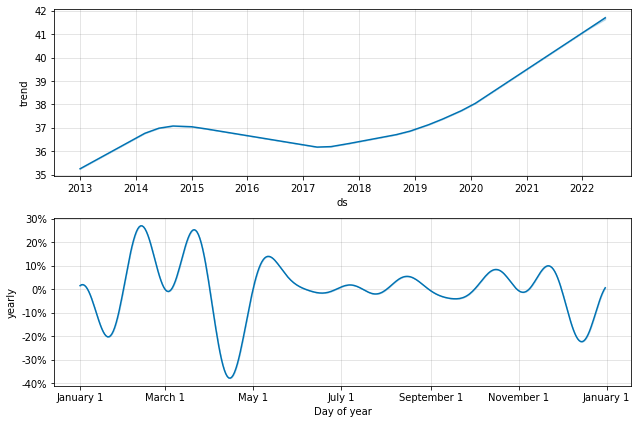

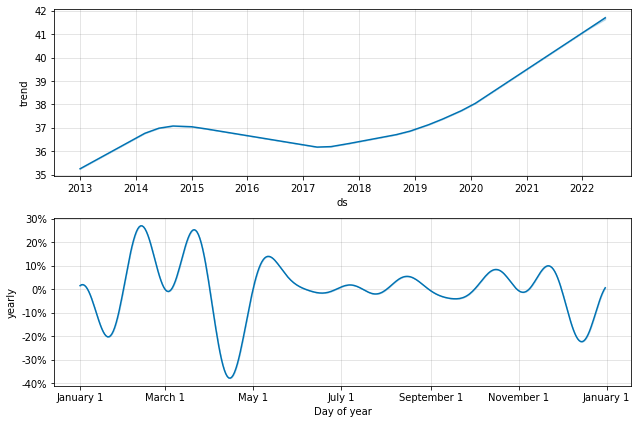

In [66]:
fig2 = m.plot_components(fcst)

fig2

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.




Gradient evaluation took 0.00018 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.8 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)

Gradient evaluation took 0.000177 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.77 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 210 / 300 [ 70%]  (Sampling)
Iteration: 210 / 3

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration: 300 / 300 [100%]  (Sampling)

 Elapsed Time: 1.629 seconds (Warm-up)
               2.31491 seconds (Sampling)
               3.94391 seconds (Total)


Gradient evaluation took 3.3e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.33 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 300 [  0%]  (Warmup)


Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 136)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.



Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  30 / 300 [ 10%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration:  60 / 300 [ 20%]  (Warmup)
Iteration:  90 / 300 [ 30%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 120 / 300 [ 40%]  (Warmup)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 150 / 300 [ 50%]  (Warmup)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 151 / 300 [ 50%]  (Sampling)
Iteration: 210 / 300 [ 70%]  (Sampling)
Iteration: 180 / 300 [ 60%]  (Sampling)
Iteration: 240 / 300 [ 80%]  (Sampling)
Iteration: 210 / 300 [ 70%]  (Sampling)
Iteration: 270 / 300 [ 90%]  (Sampling)
Iteration: 240 / 300 [ 80%]  (Sampling)
Iteration: 300 / 300 [100%]  (Sampling)

 Elapsed Time: 1.66289 seconds (Warm-up)
               2.24551 seconds (Sampling)
               3.90839 seconds (Total)

Iteration: 270 / 300 [ 90%]  (Sampling)
Iteration: 300 / 300 [100%]  (Sampling)

 Elapsed Time: 1.73304 seconds (Warm-up)
            

/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


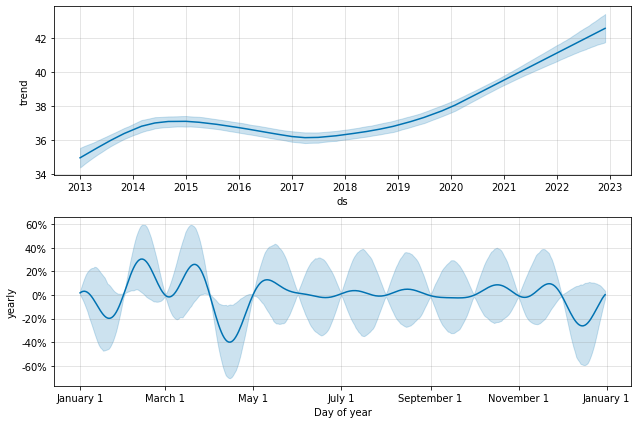

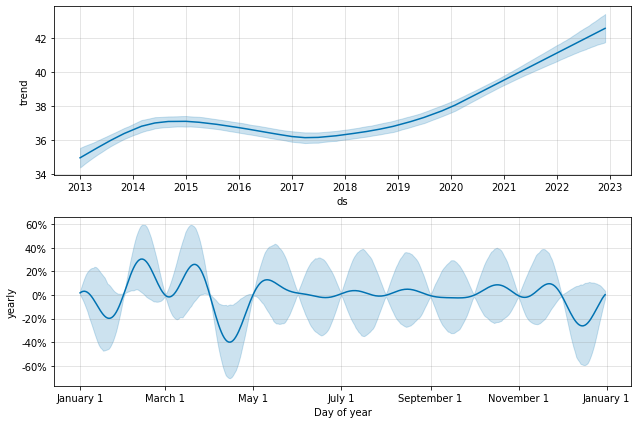

In [9]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df_prophet)  #300
fcst = m.predict(future)
trendFig = m.plot_components(fcst)
trendFig

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.09889
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       363.809   0.000887592       64.9467      0.9987      0.9987      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       364.226   0.000567315       123.737   5.814e-06       0.001      214  LS failed, Hessian reset 
     199       364.442   0.000262407        88.026           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291       364.969   6.79385e-05       63.0967   1.034e-06       0.001      422  LS failed, Hessian reset 
     299       364.975   4.75618e-05       55.2985           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       365.011    0.00239805       84.3783           1           1      576   
    Iter      log pro

/usr/local/lib/python3.8/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


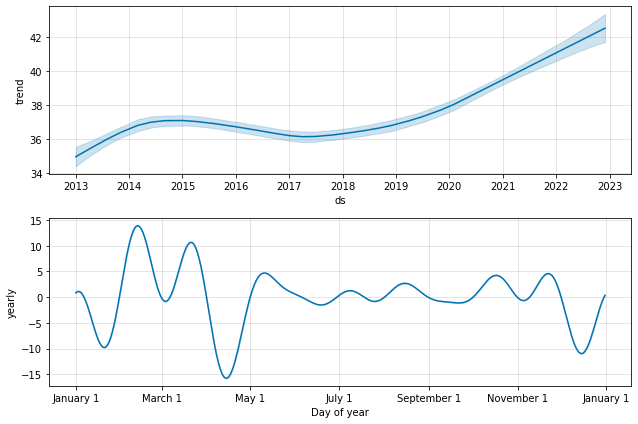

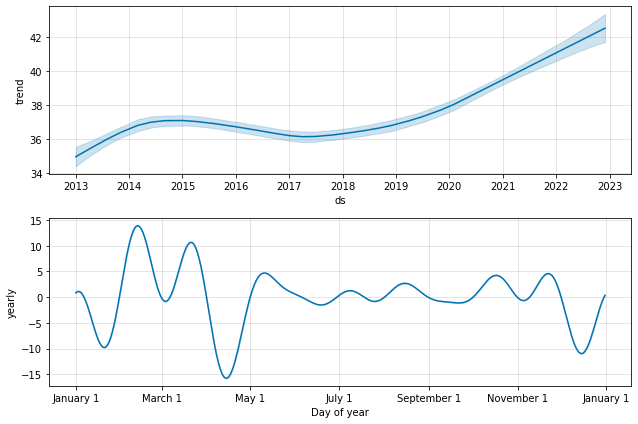

In [10]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df_prophet).predict(future)
fig = m.plot_components(fcst)

fig